# Driven Data : Warm up - Machine Learning with a heart

Link : https://www.drivendata.org/competitions/54/machine-learning-with-a-heart/

Your goal is to predict the binary class <b>heart_disease_present</b>, which represents whether or not a patient has heart disease:

 - 0 represents no heart disease present
 - 1 represents heart disease present

Performance is evaluated according to <b>binary log loss.</b>

In [3]:
# Put these at the top of every notebook
import pandas as pd
from IPython.core.display import display, HTML

%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Make sure we can see the whole dataset and not a subset
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

# Make the notebook fill 100% of browser width.
display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')


# Load the libraries required to analyse the dataset

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

from Utils.DataUtils import *
from Utils.UtilsViz import *

#### Use Pandas to load the dataset

In [5]:
train_features = pd.read_csv("./data/train_values.csv")
train_labels = pd.read_csv("./data/train_labels.csv")
test_features = pd.read_csv("./data/test_values.csv")

In [8]:
display(
    train_features.head(), 
    train_labels.head(), 
    test_features.head()
)
print("Size of train_features :", train_features.shape)
print("Size of train_labels :", train_labels.shape)
print("Size of test_features :", test_features.shape)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,olalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0
1,z9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0
2,5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1
3,mrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0
4,uki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1


Size of train_features : (180, 14)
Size of train_labels : (180, 2)
Size of test_features : (90, 14)


#### Merge the labels and features to get a combined dataset

In [28]:
data = pd.merge(train_features, train_labels, how='inner')

In [29]:
display(
    data.head(),
    data.shape)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


(180, 15)

####  Are there any missing data points?

In [30]:
analyse_nans(data)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
total,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
percentage,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
idx_list,[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]


#### Drop irrelevant columns 

In [31]:
drop_cols = ["patient_id"]
# data.drop(labels=drop_cols, inplace=True, axis=1) <-- throws an error if column does not exist
for c in drop_cols:
    if c in data.columns:
        data.drop(labels=c, inplace=True, axis=1)

#### There is a mix of categorical and continuous variables

Let's just separate them for a quick visualisation

In [32]:
y_var = ["heart_disease_present"]

cat_vars = ["slope_of_peak_exercise_st_segment", "thal", "chest_pain_type", 
            "resting_ekg_results", "sex", "exercise_induced_angina", "fasting_blood_sugar_gt_120_mg_per_dl"]

cont_vars = [c for c in data.columns if c not in cat_vars + y_var]

for cv in cat_vars:
    data[cv] = data[cv].astype("category")


display(data[cat_vars].head())
display(data[cont_vars].head())

,slope_of_peak_exercise_st_segment,thal,chest_pain_type,resting_ekg_results,sex,exercise_induced_angina,fasting_blood_sugar_gt_120_mg_per_dl
0,1,normal,2,2,1,0,0
1,2,normal,3,0,0,0,0
2,1,normal,4,2,1,1,0
3,1,reversible_defect,4,0,1,0,0
4,3,reversible_defect,1,2,1,0,0


,resting_blood_pressure,num_major_vessels,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,age,max_heart_rate_achieved
0,128,0,308,0.0,45,170
1,110,0,214,1.6,54,158
2,125,3,304,0.0,77,162
3,152,0,223,0.0,40,181
4,178,0,270,4.2,59,145


# EDA

In [45]:
# Uncomment these lines to check correlation
# f, ax = plt.subplots(1,1,figsize=(7,7))
# plot_corr_heatmap(np.round(data[cont_vars].corr(),2), ax=ax, annotate=True)

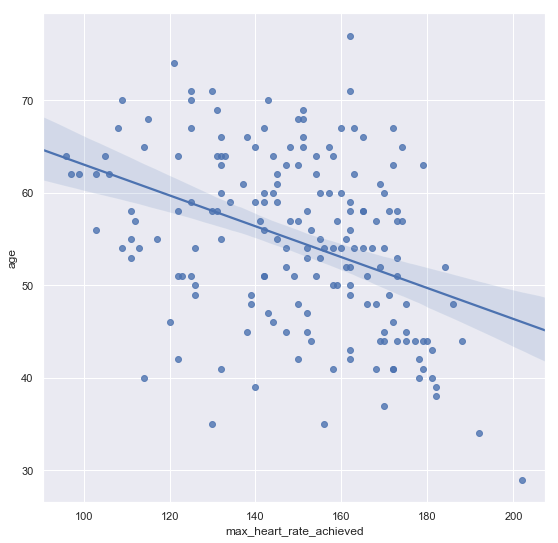

In [44]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,9))
g = sns.regplot(y="age", x="max_heart_rate_achieved", data=data, ax=ax)

In [46]:
# Takes a few seconds to plot the graph
# g = sns.pairplot(data=data[cont_vars], diag_kind="kde")

------------

#  Encoding

In [48]:
data, lenc_dict = labelencode_collist(data, cat_vars)
# data, ohe_dict = onehotencode_collist(data, cat_vars)
data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0,1,128,1,0,0,2,308,0.0,1,45,170,0,0
1,1,1,110,2,0,0,0,214,1.6,0,54,158,0,0
2,0,1,125,3,3,0,2,304,0.0,1,77,162,1,1
3,0,2,152,3,0,0,0,223,0.0,1,40,181,0,1
4,2,2,178,0,0,0,2,270,4.2,1,59,145,0,0


------

# Split the columns into features and target variable

In [49]:
ycol = ["heart_disease_present"]
xcol = [c for c in data.columns if c.lower() not in ycol]

------

# Scaling

In [50]:
data, scaler_dict = scale_collist(data, xcol)
data = data[xcol + ycol]

In [51]:
data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,-0.891241,-0.647059,-0.195195,-1.234775,-0.718403,-0.438238,0.953850,1.118269,-0.903207,0.672022,-1.053964,0.932485,-0.680746,0
1,0.729197,-0.647059,-1.256320,-0.166220,-0.718403,-0.438238,-1.054255,-0.669778,0.527616,-1.488048,-0.087134,0.387084,-0.680746,0
2,-0.891241,-0.647059,-0.372049,0.902335,2.385097,-0.438238,0.953850,1.042182,-0.903207,0.672022,2.383654,0.568884,1.468977,1
3,-0.891241,1.117647,1.219639,0.902335,-0.718403,-0.438238,-1.054255,-0.498582,-0.903207,0.672022,-1.591092,1.432436,-0.680746,1
4,2.349636,1.117647,2.752375,-2.303330,-0.718403,-0.438238,0.953850,0.395442,2.852703,0.672022,0.449994,-0.203768,-0.680746,0


------------

#  Train Test Split

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
train_data, test_data = train_test_split(data, test_size=0.3)
x_train = train_data[xcol].values
y_train = train_data[ycol].values
x_test = test_data[xcol].values
y_test = test_data[ycol].values

------------

# Logistic Regresion

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [55]:
logreg = LogisticRegression().fit(x_train, y_train)
rsq = logreg.score(x_train, y_train)
adjusted_r_squared = 1 - (1 - rsq)*(len(y_train)-1) /\
                            (len(y_train) - x_train.shape[1] - 1)

print("Adjusted Rsq. :", adjusted_r_squared)

y_pred_train = logreg.predict(X=x_train)
ll_train = log_loss(y_train, y_pred_train)

print("Train set Log Loss: {:.2f}".format(ll_train))


Adjusted Rsq. : 0.8228458049886621
Train set Log Loss: 5.48


Run the model on the test set

In [56]:
y_pred_test = logreg.predict(X=x_test)
ll_test = log_loss(y_test, y_pred_test)
print("Test set Log Loss: {:.2f}".format(ll_test))

Test set Log Loss: 6.40


In [57]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(y_test, y_pred_test, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86        34
           1       0.78      0.70      0.74        20

   micro avg       0.81      0.81      0.81        54
   macro avg       0.81      0.79      0.80        54
weighted avg       0.81      0.81      0.81        54

